In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  

In [106]:
x_train_1=[]
y_train_1=[]
with open("data/D2z.txt") as f:
    lines = f.read().splitlines()
for row in lines:
    numbers = [float(i) for i in row.split()]
    x_train_1.append(numbers[:2])
    y_train_1.append(numbers[2])

In [10]:
try:
    X = np.array(x_train_1)
    y = np.array(y_train_1).flatten()
except:
    print("Coercing input data to NumPy arrays failed")

In [11]:
y

array([0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.])

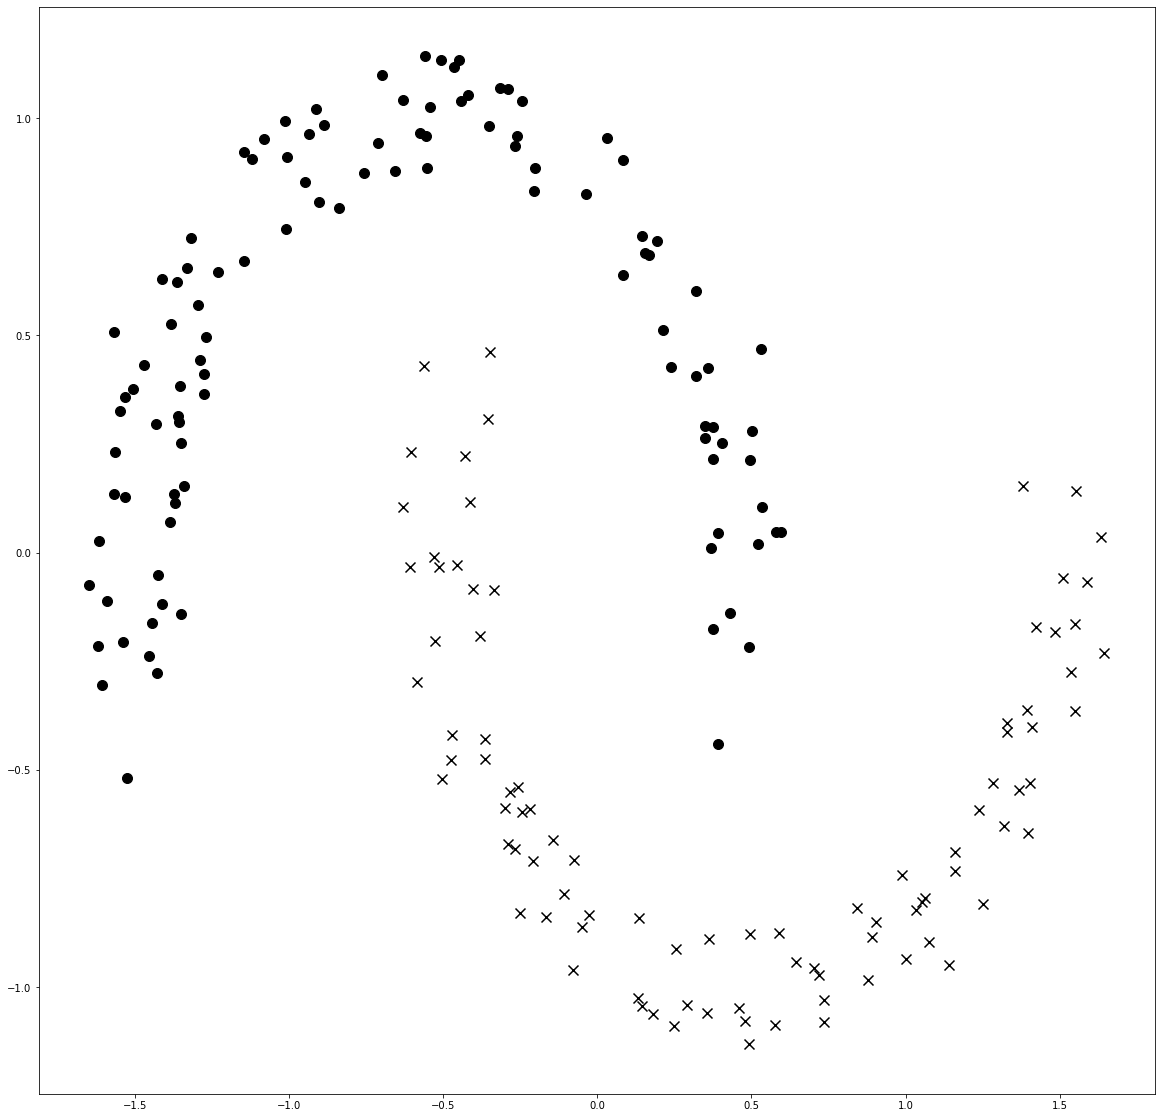

In [45]:
plt.figure(figsize=(20,20))
#plt.scatter(X[:, 0], X[:, 1], c=y, marker='x')
markers = ["x","o"]
for i, c in enumerate(np.unique(y)):
    plt.scatter(X[:,0][y==c],X[:,1][y==c],c="black", marker=markers[i], s=100)

In [33]:
def k_nn(k, t, x):
    dl = []
    for point in x:
        d = (t[0]-point[0])**2+(t[1]-point[1])**2
        dl.append(d)
    sl = sorted(range(len(dl)), key=lambda t: dl[t])
    sk = sl[:k]
    return sk

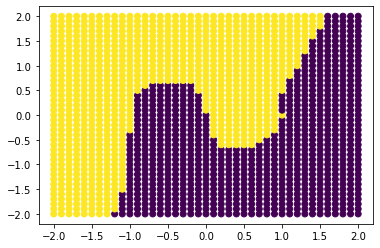

In [41]:
x_test = []
y_test = []
for i in range(41):
    x1 = -2+i*0.1
    for j in range(41):
        x2 = -2+j*0.1
        tmp = [x1,x2]
        near =  k_nn(1, tmp, x_train_1)
        tmpl = y[near[0]]
        x_test.append(tmp)
        y_test.append(tmpl)
plt.scatter(np.array(x_test)[:, 0], np.array(x_test)[:, 1], c=y_test)

In [37]:
k_nn(1, [2,2], X)

[148]

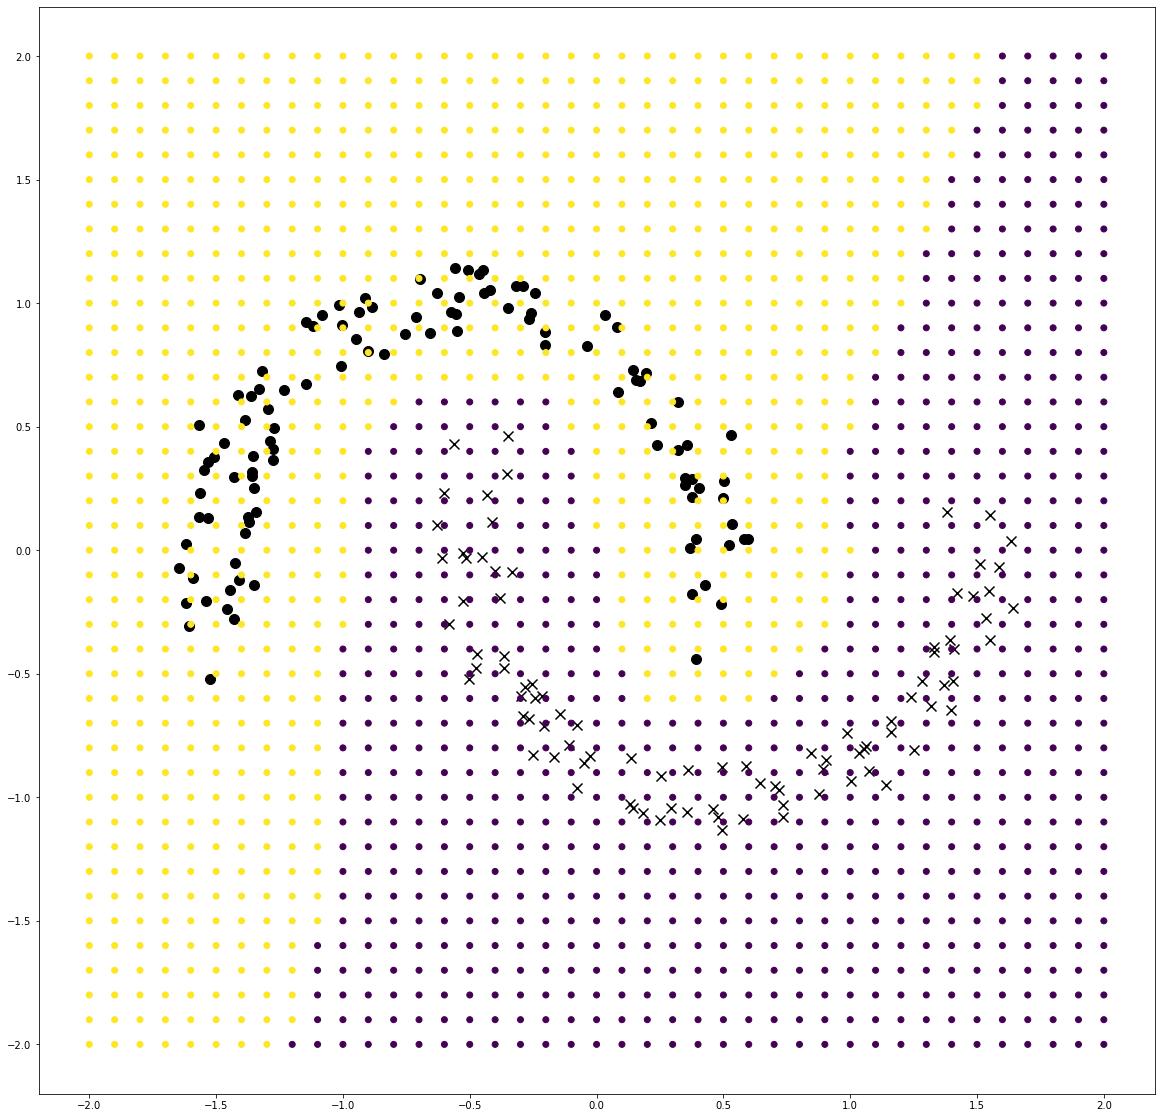

In [46]:
plt.figure(figsize=(20,20))
markers = ["x","o"]
for i, c in enumerate(np.unique(y)):
    plt.scatter(X[:,0][y==c],X[:,1][y==c],c="black", marker=markers[i], s=100)
plt.scatter(np.array(x_test)[:, 0], np.array(x_test)[:, 1], c=y_test)

In [56]:
import csv

with open('data/emails.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)
header = data[0]
email5000 = data[1:5001]
x5000 = []
y5000 = []
for email in email5000:
    x5000.append(email[1:3001])
    y5000.append(email[3001])

In [67]:
x5000 = [[float(j) for j in i] for i in x5000]
y5000 = [[float(j) for j in i] for i in y5000]

In [75]:
x1000_train = x5000[1000:]
y1000_train = y5000[1000:]
y1000_train = np.array(y1000_train).flatten()
x1000_test = x5000[:1000]
y1000_test = y5000[:1000]
y1000_test = np.array(y1000_test).flatten()

In [59]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


In [83]:
def metric(pred, y):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(y)):
        if pred[i]==1 and y[i]==1:
            TP += 1
        elif pred[i]==0 and y[i]==1:
            FN += 1
        elif pred[i]==0 and y[i]==0:
            TN += 1
        elif pred[i]==1 and y[i]==0:
            FP += 1
    accuracy = (TN+TP)/1000
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    return (accuracy, precision, recall)

In [89]:
x2000_train = x5000[0:1000]+x5000[2000:]
y2000_train = y5000[0:1000]+y5000[2000:]
y2000_train = np.array(y2000_train).flatten()
x2000_test = x5000[1000:2000]
y2000_test = y5000[1000:2000]
y2000_test = np.array(y2000_test).flatten()

In [99]:
x3000_train = x5000[0:2000]+x5000[3000:]
y3000_train = y5000[0:2000]+y5000[3000:]
y3000_train = np.array(y3000_train).flatten()
x3000_test = x5000[2000:3000]
y3000_test = y5000[2000:3000]
y3000_test = np.array(y3000_test).flatten()

In [95]:
x4000_train = x5000[0:3000]+x5000[4000:]
y4000_train = y5000[0:3000]+y5000[4000:]
y4000_train = np.array(y4000_train).flatten()
x4000_test = x5000[3000:4000]
y4000_test = y5000[3000:4000]
y4000_test = np.array(y4000_test).flatten()

In [96]:
x5000_train = x5000[0:4000]
y5000_train = y5000[0:4000]
y5000_train = np.array(y5000_train).flatten()
x5000_test = x5000[4000:]
y5000_test = y5000[4000:]
y5000_test = np.array(y5000_test).flatten()

In [138]:
onenn = KNeighborsClassifier(n_neighbors=1)
onenn.fit(x1000_train, y1000_train)
y1000_predict = onenn.predict(x1000_test)
metric(y1000_predict,y1000_test)

(0.825, 0.6544943820224719, 0.8175438596491228)

In [132]:
onenn.fit(x2000_train, y2000_train)
y2000_predict = onenn.predict(x2000_test)
metric(y2000_predict,y2000_test)

(0.853, 0.6857142857142857, 0.8664259927797834)

In [133]:
onenn.fit(x3000_train, y3000_train)
y3000_predict = onenn.predict(x3000_test)
metric(y3000_predict,y3000_test)

(0.862, 0.7212121212121212, 0.8380281690140845)

In [136]:
onenn.fit(x4000_train, y4000_train)
y4000_predict = onenn.predict(x4000_test)
metric(y4000_predict,y4000_test)

(0.851, 0.7164179104477612, 0.8163265306122449)

In [137]:
onenn.fit(x5000_train, y5000_train)
y5000_predict = onenn.predict(x5000_test)
metric(y5000_predict,y5000_test)

(0.775, 0.6057441253263708, 0.7581699346405228)

In [105]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, max_iter=1000, penalty="none").fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])


clf.score(X, y)


0.9866666666666667

In [117]:
lrf = LogisticRegression(random_state=0, max_iter=1000, penalty="none")
lrf.fit(x1000_train, y1000_train)
metric(lrf.predict(x1000_test),y1000_test)

(0.967, 0.9117647058823529, 0.9789473684210527)

In [118]:
lrf.fit(x2000_train, y2000_train)
metric(lrf.predict(x2000_test),y2000_test)

(0.973, 0.9464285714285714, 0.9566787003610109)

In [119]:
lrf.fit(x3000_train, y3000_train)
metric(lrf.predict(x3000_test),y3000_test)

(0.964, 0.9161073825503355, 0.9612676056338029)

In [120]:
lrf.fit(x4000_train, y4000_train)
metric(lrf.predict(x4000_test),y4000_test)

(0.947, 0.9140893470790378, 0.9047619047619048)

In [121]:
lrf.fit(x5000_train, y5000_train)
metric(lrf.predict(x5000_test),y5000_test)

(0.933, 0.8793650793650793, 0.9052287581699346)

In [122]:
x_train = [x1000_train,x2000_train,x3000_train,x4000_train,x5000_train]
y_train = [y1000_train,y2000_train,y3000_train,y4000_train,y5000_train]
x_test = [x1000_test,x2000_test,x3000_test,x4000_test,x5000_test]
y_test = [y1000_test,y2000_test,y3000_test,y4000_test,y5000_test]

In [140]:
0.775+0.851+0.862+0.853+0.825

4.166

In [141]:
4.166/5

0.8332

In [139]:
threenn = KNeighborsClassifier(n_neighbors=3)
sum = 0
for i in range(5):
    threenn.fit(x_train[i], y_train[i])
    sum += metric(threenn.predict(x_test[i]),y_test[i])[0]
sum/5

0.8422000000000001

In [142]:
fnn = KNeighborsClassifier(n_neighbors=5)
sum = 0
for i in range(5):
    fnn.fit(x_train[i], y_train[i])
    sum += metric(fnn.predict(x_test[i]),y_test[i])[0]
sum/5

0.8408

In [143]:
snn = KNeighborsClassifier(n_neighbors=7)
sum = 0
for i in range(5):
    snn.fit(x_train[i], y_train[i])
    sum += metric(snn.predict(x_test[i]),y_test[i])[0]
sum/5

0.8462

In [146]:
tnn = KNeighborsClassifier(n_neighbors=10)
sum = 0
for i in range(5):
    tnn.fit(x_train[i], y_train[i])
    sum += metric(tnn.predict(x_test[i]),y_test[i])[0]
    print(sum)
sum/5

0.862
1.7309999999999999
2.609
3.496
4.2780000000000005


0.8556000000000001

In [147]:
onn = KNeighborsClassifier(n_neighbors=1)
sum = 0
for i in range(5):
    onn.fit(x_train[i], y_train[i])
    sum += metric(onn.predict(x_test[i]),y_test[i])[0]
sum/5

0.8332

In [150]:
from sklearn.metrics import roc_auc_score, plot_roc_curve,
# X, y = load_breast_cancer(return_X_y=True)
roc_auc_score(y5000_test, lrf.predict_proba(x5000_test)[:, 1])

# roc_auc_score(y, clf.decision_function(X))

0.9505660093047786

C:\Users\46145\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\46145\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


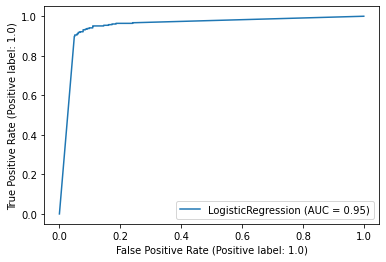

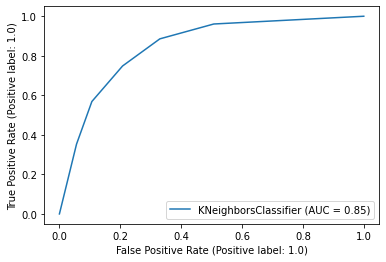

In [154]:
p1 = plot_roc_curve(lrf, x5000_test, y5000_test)
p2 = plot_roc_curve(fnn, x5000_test, y5000_test)
plt.show()

C:\Users\46145\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


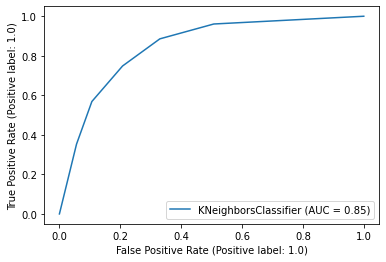

In [152]:
fnn.fit(x_train[4], y_train[4])
plot_roc_curve(fnn, x5000_test, y5000_test)

In [179]:
(x1,y1)=p1.line_.get_data()
(x2,y2)=p2.line_.get_data()

In [177]:
x1

array([0.        , 0.04899135, 0.05043228, 0.05043228, 0.05763689,
       0.05763689, 0.05907781, 0.05907781, 0.06195965, 0.06195965,
       0.06772334, 0.06772334, 0.07348703, 0.07636888, 0.0778098 ,
       0.0778098 , 0.08501441, 0.08501441, 0.0907781 , 0.0907781 ,
       0.09365994, 0.09798271, 0.09798271, 0.10518732, 0.10806916,
       0.10951009, 0.10951009, 0.11239193, 0.11815562, 0.12103746,
       0.12391931, 0.13400576, 0.13688761, 0.14121037, 0.14409222,
       0.14553314, 0.14553314, 0.14841499, 0.15129683, 0.15850144,
       0.16138329, 0.16138329, 0.16570605, 0.1685879 , 0.17291066,
       0.17291066, 0.18587896, 0.18587896, 0.19308357, 0.19596542,
       0.20317003, 0.20893372, 0.21181556, 0.21469741, 0.21613833,
       0.22190202, 0.22910663, 0.23198847, 0.23775216, 0.24063401,
       0.24063401, 0.24783862, 1.        ])

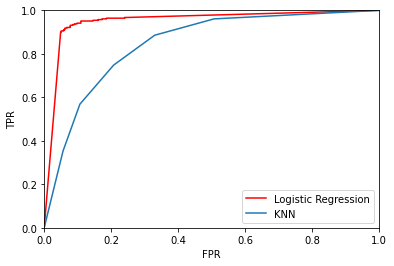

In [198]:
line1 = Line2D(x1,y1)
line2 = Line2D(x2,y2)
line1.set_color("red")
line1.set_label("Logistic Regression")
line2.set_label("KNN")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.add_line(line1)
ax.add_line(line2)
plt.xlabel("FPR")
plt.ylabel("TPR")
leg = plt.legend()

In [185]:
plt.show()

In [194]:
dir(Line2D)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_alias_map',
 '_default_contains',
 '_drawStyles_l',
 '_drawStyles_s',
 '_get_clipping_extent_bbox',
 '_get_markerfacecolor',
 '_get_transformed_path',
 '_is_sorted',
 '_lineStyles',
 '_set_gc_clip',
 '_transform_path',
 'add_callback',
 'axes',
 'contains',
 'convert_xunits',
 'convert_yunits',
 'draw',
 'drawStyleKeys',
 'drawStyles',
 'fillStyles',
 'filled_markers',
 'findobj',
 'format_cursor_data',
 'get_aa',
 'get_agg_filter',
 'get_alpha',
 'get_animated',
 'get_antialiased',
 'get_c',
 'get_children',
 'get_clip_box',
 'get_clip_on',
 'get_clip_path',
 'get_color',
 'get_contains',
 'get_cursor_